In [1]:
from typing import List, TypedDict
from langgraph.graph import StateGraph,START,END
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
import os

In [2]:
"""Podłączenie do API OpenAI """
load_dotenv() 
chat_llm = ChatOpenAI(model="gpt-4o") 


In [3]:
class AgentState(TypedDict):
    image: str
    ingredients: List[str]
    recipe: str

from langchain_core.messages import HumanMessage

def image_to_recipe(state: AgentState) -> AgentState:
    msg = HumanMessage(content=[
        {
            "type": "image",
            "source": {
                "type": "base64",
                "media_type": "image/jpeg",
                "data": state["image"],
            }
        },
        {"type": "text", "text": "What is the recipe for this dish?"}
    ])
    response = chat_llm.invoke([msg])
    return {**state, "recipe": response.content}


In [4]:
graph = StateGraph(AgentState)
graph.add_node("image_to_recipe", image_to_recipe)
graph.add_edge(START, "image_to_recipe")
graph.add_edge("image_to_recipe", END)
agent = graph.compile()

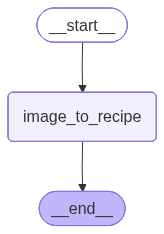

In [5]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))


In [6]:
import base64
img = base64.b64encode(open("dish2.jpg", "rb").read()).decode()

result = agent.invoke({
    "image": img,
    "ingredients": [],
    "recipe": "",
})
print(result["recipe"])

This image shows ingredients for a chicken sandwich. Here's a basic recipe you can follow:

### Ingredients:
- Chicken breasts
- Burger buns
- Lettuce leaves
- Tomato slices
- Pickle slices
- Salt, pepper, and garlic powder
- Optional: Additional seasonings or condiments like mayo or mustard

### Instructions:

1. **Prepare the Chicken:**
   - Season the chicken breasts with salt, pepper, and garlic powder (and any other preferred spices).

2. **Cook the Chicken:**
   - Grill or pan-fry the chicken over medium heat until cooked through and no longer pink in the center (about 6-7 minutes per side depending on thickness).

3. **Assemble the Sandwich:**
   - Slice the buns and toast them lightly if desired.
   - Place a piece of cooked chicken on the bottom half of each bun.
   - Add lettuce, tomato slices, and pickle slices on top of the chicken.
   - Add condiments of choice.

4. **Finish:**
   - Place the top bun on the sandwich.
   - Serve immediately.

Enjoy your chicken sandwich!
